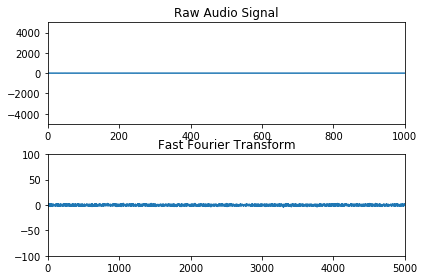


+---------------------------------+
| Press Ctrl+C to Break Recording |
+---------------------------------+

0.0
0.0
0.15625
-1.96875
-643.875
-650.40625
-2301.34375
491.3125
-137.9375
19.03125
-10.78125
-36.375
-16.75
-18.21875
-6.15625
-3.0625
-1.09375
-0.40625
-1.28125
1.90625
3.3125
0.6875
1.21875
-2.75
-0.40625
-3.28125
-1.59375
2.75
-2.09375
0.75
-1.0625
6.9375
-1.78125
2.46875
2.21875
-1.34375
2.21875
-1.34375
2.78125
2.03125
-2.5625
0.34375
-1030.625
-4.21875
-5.5625
5.9375
-0.96875
3.21875
0.9375
-0.34375
-0.90625
1.5
2.03125
3.375
-7.375
-1.65625
-5.125
-0.90625
0.21875
-6.5
-1.1875
1.46875
-7.6875
2.09375
-1.25
0.40625
-1.15625
-0.78125
6.28125
2.6875
-1.375
1.3125
2.28125
-0.90625
0.21875
-0.5
-2.75
-1.71875
-3.90625
1.25
5.03125
3.5625
-2.40625
-0.5625
-1.96875
0.65625
3.53125
-0.46875
-0.4375
3.03125
3.25
1.0625
1.0
0.65625
-1.5625
-1.15625
1.09375
-0.1875
2.1875
0.21875
0.6875
0.59375
-1.25
-1.34375
-0.875
0.03125
-0.59375
-0.125
0.21875
0.375
1.71875
0.875
-0.71875
0.0

5.03125
3.125
0.28125
2.0
-0.15625
0.8125
3.0
1.875
6.6875
-0.1875
-0.21875
-4.03125
7.9375
-8.53125
-3.5
1.15625
-2.8125


In [11]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

i=0
f,ax = plt.subplots(2)

# Prepare the Plotting Environment with random starting values
x = np.arange(10000)
y = np.random.randn(10000)

# Plot 0 is for raw audio data
li, = ax[0].plot(x, y)
ax[0].set_xlim(0,1000)
ax[0].set_ylim(-5000,5000)
ax[0].set_title("Raw Audio Signal")
# Plot 1 is for the FFT of the audio
li2, = ax[1].plot(x, y)
ax[1].set_xlim(0,5000)
ax[1].set_ylim(-100,100)
ax[1].set_title("Fast Fourier Transform")
# Show the plot, but without blocking updates
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.pause(0.01)

FORMAT = pyaudio.paInt16 # We use 16 bit format per sample
CHANNELS = 1
RATE = 44100
CHUNK = 32 # 1024 bytes of data read from the buffer
RECORD_SECONDS = 0.1
WAVE_OUTPUT_FILENAME = "file.wav"

audio = pyaudio.PyAudio()

# Claim the microphone
stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE, 
                    input=True,
                    frames_per_buffer=CHUNK)

global keep_going
keep_going = True

def plot_data(in_data):
    # get and convert the data to float
    audio_data = np.fromstring(in_data, np.int16)
    # Fast Fourier Transform, 10*log10(abs) is to scale it to dB
    # and make sure it's not imaginary
    #dfft = 10.*np.log10(abs(np.fft.rfft(audio_data)))
    
    # Force the new data into the plot, but without redrawing axes.
    li.set_xdata(np.arange(len(audio_data)))
    li.set_ydata(audio_data)
    #li2.set_xdata(np.arange(len(dfft))*10.)
    #li2.set_ydata(dfft)
    
    # Show the updated plot, but without blocking
    plt.pause(0.01)
    if keep_going:
        return True
    else: 
        return False

# Open the connection and start streaming the data
stream.start_stream()
print("\n+---------------------------------+")
print("| Press Ctrl+C to Break Recording |")
print( "+---------------------------------+\n")

# Loop so program doesn't end while the stream is open
while keep_going:
    try:
        plot_data(stream.read(CHUNK, exception_on_overflow = False))
        print np.average(np.fromstring(stream.read(CHUNK, exception_on_overflow = False), np.int16))
    except KeyboardInterrupt:
        keep_going=False
    except:
        pass

# Close up shop 
stream.stop_stream()
stream.close()

audio.terminate()